# Capstone 1 Project: Data Wrangling

Focus of exploratory data analysis will be;
- Missing data (Null values)
- Invalid data
- Duplicates
- Inconsistent column naming
- Untidiness
- Any further processing of data to make it meaningful
- Outliers

The crop information is available with variety of different data points but we will focus mainly on Yield and how it is affected by the Arces harvested, climate and labor avalability. 
<p><b>Acres Harvested</b>: Total strech of land from which the crop is harvested measured in arces. Where 1 acres is 43560 sq. ft.</p>
<p><b>Production</b>: The total amount of crop produce by weight measured in Bushel (imperical unit).<p>
<p><b>Yield</b>: Yield is the output of the land per acres, so it is production per acres (Production/Acres Harvested)</p>

## Importing data

In [2]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
from __future__ import print_function

In [3]:
data_file = 'C:/Users/patel/OneDrive/Documents/DataScience/Springboard/Projects/Capstone 1/Data/USDA_Data_v2.0.xlsx'
#data_xl_sheets = pd.ExcelFile(data_file).sheet_names
corn_df = pd.read_excel(data_file, sheet_name='Corn')[['Year','State','County','Data Item', 'Value']]
barley_df = pd.read_excel(data_file, sheet_name='Barley')[['Year','State','County','Data Item','Value']]
peanuts_df = pd.read_excel(data_file, sheet_name='Peanuts')[['Year','State','County','Data Item','Value']]
soybean_df = pd.read_excel(data_file, sheet_name='Soybean')[['Year','State','County','Data Item','Value']]

# #importing unemployment rate
# unemployment_df = pd.read_excel(data_file, sheet_name='US UnemploymentRate')
# #setting case to upper, easier to merge with rest of the data.
# unemployment_df['State']=unemployment_df['State'].str.upper()

Even though the data we got downloaded from USDA website was as County level, it still seem to have another level of detail in it. After checking the raw data the level below County is 'Ag District'. We can ignore the column but expect duplicate rows for each County for a Year. This needs to be aggregated to County level.

In [4]:
corn_df[corn_df.duplicated(['Year','State','County','Data Item'],keep=False)].sort_values(['Year','State','County','Data Item']).head()

,Year,State,County,Data Item,Value
203655,1984,ALABAMA,OTHER (COMBINED) COUNTIES,"CORN, GRAIN - ACRES HARVESTED",1500.0
203781,1984,ALABAMA,OTHER (COMBINED) COUNTIES,"CORN, GRAIN - ACRES HARVESTED",900.0
203656,1984,ALABAMA,OTHER (COMBINED) COUNTIES,"CORN, GRAIN - PRODUCTION, MEASURED IN BU",75000.0
203782,1984,ALABAMA,OTHER (COMBINED) COUNTIES,"CORN, GRAIN - PRODUCTION, MEASURED IN BU",35000.0
203657,1984,ALABAMA,OTHER (COMBINED) COUNTIES,"CORN, GRAIN - YIELD, MEASURED IN BU / ACRE",50.0


For most of the crops we have aggregate data but for corn only the most widely produced variety has data about Acres Harvested, Production and Yield. Hence in case of Corn we will be using only the data of grain variety of corn.

In [5]:
corn_df['Data Item'].unique()

array([u'CORN, GRAIN - ACRES HARVESTED',
       u'CORN, GRAIN - PRODUCTION, MEASURED IN BU',
       u'CORN, GRAIN - YIELD, MEASURED IN BU / ACRE'], dtype=object)

### Tidy up
Now we want to pivot the values in Data Item in thier own columns, so each row represnts only a obervation.

But before that we need to shorten up values so that column names are short enough. To do that we do the following,
1. Remove some of the redundent information like 'CORN, GRAIN'.
2. Certain information from Data Item needs to be cleaned up.

In [6]:
#CORN
#Removing any combination of CORN GRAIN and preceding whitespaces
corn_df.loc[:,'Data Item'] = (corn_df['Data Item'].str.replace(r'^CORN, GRAIN[\s,][\s-]','')).str.replace(r'^\s','')

#Removing anything after comma(,) as it just tells you the unit of the value.
corn_df.loc[:,'Data Item'] = corn_df['Data Item'].str.split(',').str[0]

#----------------------------------------------------------
#BARLEY
#Removing 'BARLEY -' and whitespaces
barley_df.loc[:,'Data Item'] = (barley_df['Data Item'].str.replace(r'^BARLEY[\s,][\s-]','')).str.replace(r'^\s','')

#Removing anything after comma(,) as it just tells you the unit of the value.
barley_df.loc[:,'Data Item'] = barley_df['Data Item'].str.split(',').str[0]

#----------------------------------------------------------
#PEANUTS
#Removing 'PEANUTS -' and whitespaces
peanuts_df.loc[:,'Data Item'] = (peanuts_df['Data Item'].str.replace(r'^PEANUTS[\s,][\s-]','')).str.replace(r'^\s','')

#Removing anything after comma(,) as it just tells you the unit of the value.
peanuts_df.loc[:,'Data Item'] = peanuts_df['Data Item'].str.split(',').str[0]

#----------------------------------------------------------
#SOY BEANS
#Removing 'SOYBEANS -' and whitespaces
soybean_df.loc[:,'Data Item'] = (soybean_df['Data Item'].str.replace(r'^SOYBEANS[\s,][\s-]','')).str.replace(r'^\s','')

#Removing anything after comma(,) as it just tells you the unit of the value.
soybean_df.loc[:,'Data Item'] = soybean_df['Data Item'].str.split(',').str[0]

Pivoting the 'Data Item' as well as aggregating values at County level.

In [7]:
#CORN
pivoted_corn_df = corn_df.pivot_table(index=['Year','State','County'], columns='Data Item', values='Value',aggfunc='sum').reset_index()
pivoted_corn_df.columns.name=None
pivoted_corn_df.loc[:,'CROP']='Corn'

#----------------------------------------------------------
#BARLEY
pivoted_barley_df = barley_df.pivot_table(index=['Year','State','County'], columns='Data Item', values='Value',aggfunc='sum').reset_index()
pivoted_barley_df.columns.name=None
pivoted_barley_df.loc[:,'CROP']='Barley'

#----------------------------------------------------------
#PEANUTS
pivoted_peanuts_df = peanuts_df.pivot_table(index=['Year','State','County'], columns='Data Item', values='Value',aggfunc='sum').reset_index()
pivoted_peanuts_df.columns.name=None
pivoted_peanuts_df.loc[:,'CROP']='Peanuts'

#----------------------------------------------------------
#SOY BEANS
pivoted_soybean_df = soybean_df.pivot_table(index=['Year','State','County'], columns='Data Item', values='Value',aggfunc='sum').reset_index()
pivoted_soybean_df.columns.name=None
pivoted_soybean_df.loc[:,'CROP']='SoyBeans'

In [8]:
#Combining all crops into single dataframe
crop_df = pd.concat([pivoted_corn_df,pivoted_barley_df,pivoted_peanuts_df,pivoted_soybean_df]).reset_index().drop(columns='index')

#Recalculating Yield, as Sum is not an appropriate aggregation for it.
crop_df.loc[:,'YIELD']=crop_df['PRODUCTION']/crop_df['ACRES HARVESTED']
#Rearranging columns
crop_df = crop_df[['CROP','Year','State','County','ACRES HARVESTED','PRODUCTION','YIELD']]
crop_df.tail()

,CROP,Year,State,County,ACRES HARVESTED,PRODUCTION,YIELD
147039,SoyBeans,2017,WISCONSIN,WAUKESHA,21100.0,938000.0,44.454976
147040,SoyBeans,2017,WISCONSIN,WAUPACA,29800.0,1381000.0,46.342282
147041,SoyBeans,2017,WISCONSIN,WAUSHARA,15300.0,641000.0,41.895425
147042,SoyBeans,2017,WISCONSIN,WINNEBAGO,43100.0,2039000.0,47.308585
147043,SoyBeans,2017,WISCONSIN,WOOD,20100.0,863000.0,42.935323


Looking for any odd values in these columns.

In [9]:
sp_ch = ['`','~','!','@','#','$','%','^','&','*','(',')','_','-','+','=','{','[','}','}','|','\\',':',';','"',"'",'<',',','>','.','?','/']
esc_lst =[re.escape(s) for s in sp_ch]
pattern = '|'.join(esc_lst)
print('County:',crop_df[crop_df['County'].str.contains(pattern, case=False)]['County'].unique())
print('State:',crop_df[crop_df['State'].str.contains(pattern, case=False)]['State'].unique())
print('Year:',crop_df[(crop_df['Year']<1984) | (crop_df['Year']>2018)]['Year'].unique())
print('Negative Values:',crop_df[(crop_df<0).any(1)])

County: [u'OTHER (COMBINED) COUNTIES' u'ST. JOHNS' u'ST. JOSEPH' u'ST. LOUIS'
 u'STE. GENEVIEVE' u'ST. JOHN THE BAPTIST']
State: []
Year: []
Negative Values: Empty DataFrame
Columns: [CROP, Year, State, County, ACRES HARVESTED, PRODUCTION, YIELD]
Index: []


There aren't any odd values in any of the columns but one value that can be of concern during modeling is "OTHER (COMBINED) COUNTIES". This is because mixture of combined counties changes for each year and crop. The range of values for Area, Production and Yield is so large that it will throw off the model for this County value. Hence we will drop it.

In [104]:
print(crop_df[crop_df['County']=='OTHER (COMBINED) COUNTIES'].groupby('CROP').describe().loc[:,(slice(None),['max','min'])])
filtered_crop_df = crop_df[~(crop_df['County']=='OTHER (COMBINED) COUNTIES')]

         ACRES HARVESTED            PRODUCTION                    YIELD  \
                     min        max        min          max         min   
CROP                                                                      
Barley              50.0   683700.0     2500.0   44065900.0    8.888889   
Corn               100.0  1668500.0     4000.0  233064100.0   27.428571   
Peanuts              5.0   224200.0    11000.0  923250000.0  876.470588   
SoyBeans            30.0  1763540.0      900.0   71901500.0    9.000000   

                         Year          
                  max     min     max  
CROP                                   
Barley     158.523490  1984.0  2018.0  
Corn       247.582017  1984.0  2017.0  
Peanuts   4623.287671  1984.0  2017.0  
SoyBeans    59.906358  1984.0  2017.0  


Looks like all of the columns have valid data types that corresponds to the value expected in the column.
But looking for the non-nulls in the key columns ACRES HARVESTED,PRODUCTION and YIELD have good population except for few nulls. Which we will deal with soon. For rest of the columns where non-null values that are not even 20%, we will have to ignore that data (drop columns).

In [99]:
print(filtered_crop_df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 144424 entries, 0 to 147043
Data columns (total 7 columns):
CROP               144424 non-null object
Year               144424 non-null int64
State              144424 non-null object
County             144424 non-null object
ACRES HARVESTED    143870 non-null float64
PRODUCTION         143870 non-null float64
YIELD              143869 non-null float64
dtypes: float64(3), int64(1), object(3)
memory usage: 8.8+ MB
None


Looking for duplicates by Crop, Year, State and County but there are none.

In [12]:
filtered_crop_df[filtered_crop_df.duplicated(['CROP','Year','State','County'],keep=False)]

,CROP,Year,State,County,ACRES HARVESTED,PRODUCTION,YIELD


The distribution of all the columns looks normally distributed. Although Acres Harvested and Production is denser towards the 0, which just mean there are more smaller farms. Hence no further action is required here.

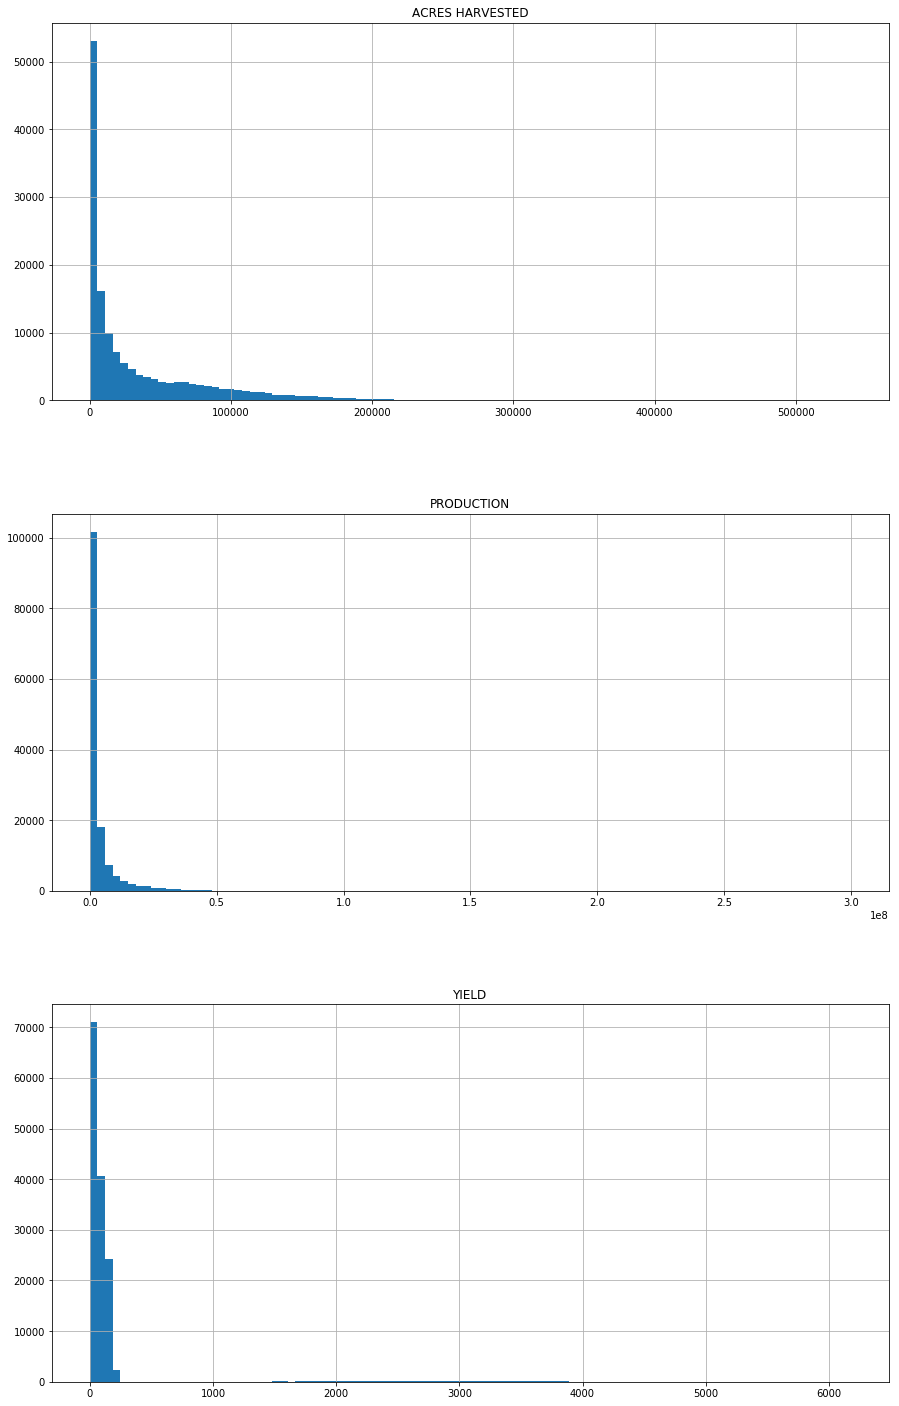

In [13]:
filtered_crop_df[['ACRES HARVESTED','PRODUCTION','YIELD']].hist(figsize=(15,25) ,layout=(3,1),bins=100)
plt.show()

****************

## Data Enrichment
### Unemployment Rate
This dataset is from Bureau of Labor Statistics. The downloaded excel workbook consisted of state wise unemployment for every month since Jan 1976 to Nov 2018. The set was split by state with each state in a separate sheet, hence needed to be combined into one large set. And since the crop statistics is on yearly basis, this set needs to be aggregated to yearly numbers.

Once the set is combined and aggregated we write it into another excel file and later manually added as a seperate sheet to rest of the data workbook.

In [14]:
import pandas as pd

Unemployment_xl = 'C:/Users/patel/OneDrive/Documents/DataScience/Springboard/Projects/Capstone 1/Data/UnemploymentRate_Raw_ByState_Yearly.xlsx'
xl_sheets = pd.ExcelFile(Unemployment_xl).sheet_names
unemployment_df = pd.DataFrame({})

def read_unemployment_sheet(sheet):
    #Reading one sheet from excel, while only selecting first 5 columns as rest of the columns are empty. 
    df = pd.read_excel(Unemployment_xl, sheet_name=sheet).iloc[:,:5]
    
    #Assigning state name, that's located at 7th row of 2nd column, to seperate column.
    state_name = df.iloc[6,1]
    #print(state_name)
    df['Unnamed: 4']=state_name
    
    #Filtering out all rows above the actual data.
    df = df.iloc[11:,:]
    
    #Renaming columns
    df.columns = ['Year','Period','Month','Unemployment Rate','State']
    
    #Type casting to make sure 'Unemployment Rate' is numeric before taking yearly averages
    df['Unemployment Rate']=pd.to_numeric(df['Unemployment Rate'])
    
    #Takes mean 'Unemployment Rate' across year.
    df['Yearly Unemployment Rate'] = df.groupby('Year')['Unemployment Rate'].transform('mean')
    
    #returns selected columns and dropping duplicates.
    return df[['State','Year','Yearly Unemployment Rate']].drop_duplicates()
    
unemployment_df = unemployment_df.append(map(read_unemployment_sheet,xl_sheets))
unemployment_df['State']=unemployment_df['State'].str.upper()
unemployment_df['Year']=unemployment_df['Year'].astype('int64')
print(unemployment_df.head())

      State  Year  Yearly Unemployment Rate
11  ALABAMA  1976                  6.766667
23  ALABAMA  1977                  7.316667
35  ALABAMA  1978                  6.316667
47  ALABAMA  1979                  7.175000
59  ALABAMA  1980                  8.883333


In [15]:
writer = pd.ExcelWriter('C:/Users/patel/OneDrive/Documents/DataScience/Springboard/Projects/Capstone 1/Data/UnemploymentRate_Pivoted_ByState_Yearly.xlsx')
unemployment_df.to_excel(writer,'US UnemploymentRate', index=False)
writer.save()

Combining Unemployment data with yield.

In [115]:
enriched_df_unemp = pd.merge(filtered_crop_df,unemployment_df,how='left')
enriched_df_unemp.head()

,CROP,Year,State,County,ACRES HARVESTED,PRODUCTION,YIELD,Yearly Unemployment Rate
0,Corn,1984,ALABAMA,AUTAUGA,2500.0,103000.0,41.200000,11.0
1,Corn,1984,ALABAMA,BALDWIN,40700.0,3196000.0,78.525799,11.0
2,Corn,1984,ALABAMA,BARBOUR,7700.0,434000.0,56.363636,11.0
3,Corn,1984,ALABAMA,BLOUNT,2200.0,124000.0,56.363636,11.0
4,Corn,1984,ALABAMA,BULLOCK,2000.0,108000.0,54.000000,11.0


### Weather Data

In [142]:
#importing weather data
weather_file = 'C:/Users/patel/OneDrive/Documents/DataScience/Springboard/Projects/Capstone 1/Data/Weather_Historical_US_County_Yearly.xlsx'
weather_xl_sheets = pd.ExcelFile(weather_file).sheet_names
raw_weather_df = pd.read_excel(weather_file)

In [164]:
weather_df = raw_weather_df.copy()
enriched_df_CST=enriched_df_unemp.copy()

# matching cases to base data
weather_df['State'] = weather_df['State'].str.upper()
weather_df['County'] = weather_df['County'].str.upper()

#Cleaning up
# matching county columns on both side
weather_df['County_ST']=weather_df['County'].str.replace(r'\sPARISH','',regex=True).replace(r'\.','',regex=True).replace(r"\'","",regex=True).replace(r'^SAINT','ST',regex=True).replace(r'\s','',regex=True)
enriched_df_CST['County_ST']=enriched_df_CST['County'].str.replace(r'\sPARISH','',regex=True).replace(r'\.','',regex=True).replace(r"\'","",regex=True).replace(r'^SAINT','ST',regex=True).replace(r'\s','',regex=True)

#merging on matched columns
enriched_df = pd.merge(enriched_df_CST, weather_df, how='left', left_on=['Year','State','County_ST'], right_on=['Year','State','County_ST'])

enriched_df = enriched_df.drop(columns=['County_y','County_ST'])
enriched_df.rename(columns={'County_x':'County'},inplace=True)

#### Saving data to file.

In [165]:
corp_writer = pd.ExcelWriter('C:/Users/patel/OneDrive/Documents/DataScience/Springboard/Projects/Capstone 1/Data/Crop_Pivoted.xlsx')
enriched_df.to_excel(corp_writer,'Crop Data', index=False)
corp_writer.save()